# Machine Learning using TicTacToe-EndGame Dataset

- Dataset Link : https://archive.ics.uci.edu/dataset/101/tic+tac+toe+endgame

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.svm import SVC

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [ ]:
# google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/tic-tac-toe.data')

In [ ]:
data

,x,x.1,x.2,x.3,o,o.1,x.4,o.2,o.3,positive
0,x,x,x,x,o,o,o,x,o,positive
1,x,x,x,x,o,o,o,o,x,positive
2,x,x,x,x,o,o,o,b,b,positive
3,x,x,x,x,o,o,b,o,b,positive
4,x,x,x,x,o,o,b,b,o,positive
...,...,...,...,...,...,...,...,...,...,...
952,o,x,x,x,o,o,o,x,x,negative
953,o,x,o,x,x,o,x,o,x,negative
954,o,x,o,x,o,x,x,o,x,negative
955,o,x,o,o,x,x,x,o,x,negative


# Preview of Data
This database encodes the complete set of possible board configurations at the end of tic-tac-toe games, where "x" is assumed to have played first.  The target concept is "win for x" (i.e., true when "x" has one of 8 possible ways to create a "three-in-a-row").  
## Instances : 957 , Attributes : 9
    1. top-left-square: {x,o,b}
    2. top-middle-square: {x,o,b}
    3. top-right-square: {x,o,b}
    4. middle-left-square: {x,o,b}
    5. middle-middle-square: {x,o,b}
    6. middle-right-square: {x,o,b}
    7. bottom-left-square: {x,o,b}
    8. bottom-middle-square: {x,o,b}
    9. bottom-right-square: {x,o,b}
    10. Class: {positive,negative}

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 957 entries, 0 to 956
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   x         957 non-null    object
 1   x.1       957 non-null    object
 2   x.2       957 non-null    object
 3   x.3       957 non-null    object
 4   o         957 non-null    object
 5   o.1       957 non-null    object
 6   x.4       957 non-null    object
 7   o.2       957 non-null    object
 8   o.3       957 non-null    object
 9   positive  957 non-null    object
dtypes: object(10)
memory usage: 74.9+ KB


In [ ]:
data.describe()

,x,x.1,x.2,x.3,o,o.1,x.4,o.2,o.3,positive
count,957,957,957,957,957,957,957,957,957,957
unique,3,3,3,3,3,3,3,3,3,2
top,x,x,x,x,x,x,x,x,x,positive
freq,417,377,417,377,458,378,417,378,418,625


In [ ]:
data['positive'].value_counts()

positive    625
negative    332
Name: positive, dtype: int64

In [ ]:
tmp = data
tmp

,x,x.1,x.2,x.3,o,o.1,x.4,o.2,o.3,positive
0,x,x,x,x,o,o,o,x,o,positive
1,x,x,x,x,o,o,o,o,x,positive
2,x,x,x,x,o,o,o,b,b,positive
3,x,x,x,x,o,o,b,o,b,positive
4,x,x,x,x,o,o,b,b,o,positive
...,...,...,...,...,...,...,...,...,...,...
952,o,x,x,x,o,o,o,x,x,negative
953,o,x,o,x,x,o,x,o,x,negative
954,o,x,o,x,o,x,x,o,x,negative
955,o,x,o,o,x,x,x,o,x,negative


import numpy as np
from google.colab import autoviz
df_2131702410544823075 = autoviz.get_registered_df('df_2131702410544823075')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_2131702410544823075, *['x'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2131702410544823075 = autoviz.get_registered_df('df_2131702410544823075')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_2131702410544823075, *['x.1'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2131702410544823075 = autoviz.get_registered_df('df_2131702410544823075')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_2131702410544823075, *['x.2'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2131702410544823075 = autoviz.get_registered_df('df_2131702410544823075')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_2131702410544823075, *['x.3'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2131702410544823075 = autoviz.get_registered_df('df_2131702410544823075')

def heatmap(df, x_colname, y_colname, figsize=(2, 2), mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=figsize)
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(df_2131702410544823075, *['x', 'x.1'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2131702410544823075 = autoviz.get_registered_df('df_2131702410544823075')

def heatmap(df, x_colname, y_colname, figsize=(2, 2), mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=figsize)
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(df_2131702410544823075, *['x.1', 'x.2'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2131702410544823075 = autoviz.get_registered_df('df_2131702410544823075')

def heatmap(df, x_colname, y_colname, figsize=(2, 2), mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=figsize)
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(df_2131702410544823075, *['x.2', 'x.3'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2131702410544823075 = autoviz.get_registered_df('df_2131702410544823075')

def heatmap(df, x_colname, y_colname, figsize=(2, 2), mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=figsize)
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(df_2131702410544823075, *['x.3', 'o'], **{})
chart

# Data Visualization
    Plots the Tic-Tac-Toe end game with colored cells based on outcomes.
    Parameters:
    - features (list): The Tic-Tac-Toe board.
    - target (list): The outcomes of each cell in the board ('positive', 'negative').


In [ ]:
type(data)

pandas.core.frame.DataFrame

In [ ]:
print(data.columns)

Index(['x', 'x.1', 'x.2', 'x.3', 'o', 'o.1', 'x.4', 'o.2', 'o.3', 'positive'], dtype='object')


In [ ]:
print(data['positive'].unique())

['positive' 'negative']


In [ ]:
X = data.iloc[:, :-1]  # Select all columns except the last one
y = data.iloc[:, -1]  # Select the last column

In [ ]:
X

,x,x.1,x.2,x.3,o,o.1,x.4,o.2,o.3
0,x,x,x,x,o,o,o,x,o
1,x,x,x,x,o,o,o,o,x
2,x,x,x,x,o,o,o,b,b
3,x,x,x,x,o,o,b,o,b
4,x,x,x,x,o,o,b,b,o
...,...,...,...,...,...,...,...,...,...
952,o,x,x,x,o,o,o,x,x
953,o,x,o,x,x,o,x,o,x
954,o,x,o,x,o,x,x,o,x
955,o,x,o,o,x,x,x,o,x


In [ ]:
y

0      positive
1      positive
2      positive
3      positive
4      positive
         ...   
952    negative
953    negative
954    negative
955    negative
956    negative
Name: positive, Length: 957, dtype: object

# Modeling with scikit-learn

### Split the dataset into a training set and a testing set

### Advantages
- By splitting the dataset pseudo-randomly into a two separate sets, we can train using one set and test using another.
- This ensures that we won't use the same observations in both sets.
- More flexible and faster than creating a model using all of the dataset for training.

### Disadvantages
- The accuracy scores for the testing set can vary depending on what observations are in the set.
- This disadvantage can be countered using k-fold cross-validation.

### Notes
- The accuracy score of the models depends on the observations in the testing set, which is determined by the seed of the pseudo-random number generator (random_state parameter).
- As a model's complexity increases, the training accuracy (accuracy you get when you train and test the model on the same data) increases.
- If a model is too complex or not complex enough, the testing accuracy is lower.
- For KNN models, the value of k determines the level of complexity. A lower value of k means that the model is more complex.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(574, 9)
(574,)
(383, 9)
(383,)


### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder

# Perform one-hot encoding on the categorical features
encoder = OneHotEncoder(sparse=False, drop='first')
X_encoded = pd.DataFrame(encoder.fit_transform(X))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.4)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

# Create and train the RandomForestClassifier model
rf_model = RandomForestClassifier(n_estimators=100, n_jobs=1)
rf_model.fit(X_train, y_train)

# predict
y_pred = rf_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


(574, 18)
(574,)
(383, 18)
(383,)


In [ ]:
# confusion matrix and accuracy

from sklearn import metrics
from sklearn.metrics import classification_report

print(f"Classification report for classifier {rf_model}:\n"
      f"{metrics.classification_report(y_test, y_pred)}\n")

Classification report for classifier RandomForestClassifier(n_jobs=1):
              precision    recall  f1-score   support

    negative       0.99      0.96      0.97       136
    positive       0.98      1.00      0.99       247

    accuracy                           0.98       383
   macro avg       0.98      0.98      0.98       383
weighted avg       0.98      0.98      0.98       383




### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=0)
dt_model.fit(X_train,y_train)

# predict
y_pred = dt_model.predict(X_test)

In [ ]:
# confusion matrix and accuracy

from sklearn import metrics
from sklearn.metrics import classification_report

print(f"Classification report for classifier {dt_model}:\n"
      f"{metrics.classification_report(y_test, y_pred)}\n")

Classification report for classifier DecisionTreeClassifier(random_state=0):
              precision    recall  f1-score   support

    negative       0.91      0.91      0.91       136
    positive       0.95      0.95      0.95       247

    accuracy                           0.94       383
   macro avg       0.93      0.93      0.93       383
weighted avg       0.94      0.94      0.94       383




### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
error = []
best_k = dict()

# Calculating error for K values between 1 and 20
for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i, n_jobs=-1)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    best_k[i] = np.mean(pred_i != y_test)

best_k = sorted(best_k.items(), key=lambda k: k[1])[0][0]
print(best_k)
knn_classifier = KNeighborsClassifier(n_neighbors=best_k, n_jobs=-1)
knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test)

1


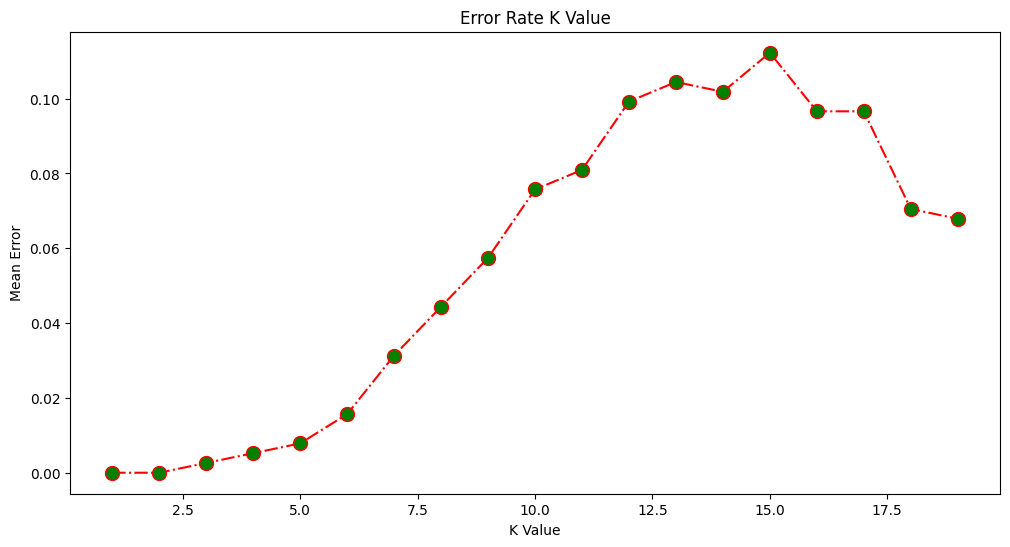

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(range(1, 20), error, color='red', linestyle='dashdot', marker='o',markerfacecolor='green', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.show()

In [ ]:
# confusion matrix and accuracy

from sklearn import metrics
from sklearn.metrics import classification_report

print(f"Classification report for classifier {knn_classifier}:\n"
      f"{metrics.classification_report(y_test, y_pred)}\n")

Classification report for classifier KNeighborsClassifier(n_jobs=-1, n_neighbors=1):
              precision    recall  f1-score   support

    negative       1.00      1.00      1.00       136
    positive       1.00      1.00      1.00       247

    accuracy                           1.00       383
   macro avg       1.00      1.00      1.00       383
weighted avg       1.00      1.00      1.00       383




### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

logisticRegr = LogisticRegression(random_state=0)

logisticRegr.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
# predict
y_pred = logisticRegr.predict(X_test)

In [ ]:
# confusion matrix and accuracy

from sklearn import metrics
from sklearn.metrics import classification_report

print(f"Classification report for classifier {logisticRegr}:\n"
      f"{metrics.classification_report(y_test, y_pred)}\n")

Classification report for classifier LogisticRegression(random_state=0):
              precision    recall  f1-score   support

    negative       0.97      0.90      0.94       136
    positive       0.95      0.98      0.97       247

    accuracy                           0.96       383
   macro avg       0.96      0.94      0.95       383
weighted avg       0.96      0.96      0.96       383




SVM

In [ ]:
model = SVC(kernel='linear')

In [ ]:
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(predictions)

['positive' 'positive' 'positive' 'negative' 'positive' 'positive'
 'positive' 'positive' 'positive' 'negative' 'positive' 'negative'
 'positive' 'negative' 'positive' 'positive' 'negative' 'negative'
 'positive' 'positive' 'negative' 'positive' 'positive' 'positive'
 'positive' 'negative' 'positive' 'negative' 'positive' 'positive'
 'negative' 'positive' 'positive' 'negative' 'positive' 'negative'
 'negative' 'positive' 'positive' 'positive' 'positive' 'negative'
 'positive' 'negative' 'positive' 'negative' 'negative' 'negative'
 'positive' 'positive' 'positive' 'positive' 'negative' 'positive'
 'negative' 'positive' 'positive' 'positive' 'negative' 'positive'
 'positive' 'positive' 'positive' 'positive' 'positive' 'negative'
 'negative' 'positive' 'positive' 'negative' 'positive' 'positive'
 'positive' 'negative' 'negative' 'positive' 'negative' 'positive'
 'negative' 'positive' 'negative' 'negative' 'negative' 'positive'
 'positive' 'positive' 'positive' 'positive' 'negative' 'posit

In [ ]:
percentage = model.score(X_test, y_test)

In [ ]:
from sklearn.metrics import confusion_matrix
res = confusion_matrix(y_test, predictions)
print("Confusion Matrix")
print(res)
print(f"Test Set: {len(X_test)}")
print(f"Accuracy = {percentage*100} %")

Confusion Matrix
[[128   8]
 [  0 247]]
Test Set: 383
Accuracy = 97.911227154047 %


Naive Bayes

In [ ]:
# According to Dataset
from sklearn.naive_bayes import GaussianNB
accuracies = {'Naive Bayes':[],'Logistic Regression': []}
model_NB = GaussianNB(priors = None)
model_NB.fit(X_train, y_train)
print(f"NB Accuracy over the datset: {model_NB.score(X_test, y_test)*100} %")

NB Accuracy over the datset: 68.40731070496084 %
